---

### **Part 1: The Theory of Lagrange Interpolation**

Polynomial interpolation aims to find a unique polynomial, $p_n(x)$, of degree $n$ that passes through a set of $n+1$ data points $(x_0, y_0), (x_1, y_1), \dots, (x_n, y_n)$. The Lagrange method achieves this without solving a system of linear equations.

#### **A. The Lagrange Basis Polynomials: $l_k(x)$**

The core of the method is the construction of $n+1$ basis polynomials, $l_k(x)$, for $k = 0, 1, \dots, n$. Each basis polynomial is specifically designed to have the property:

$$ l_k(x_i) = \begin{cases} 1 & \text{if } i = k \\ 0 & \text{if } i \neq k \end{cases} $$

This property ensures that each basis polynomial $l_k(x)$ isolates the influence of the corresponding data point $(x_k, y_k)$. The formula to construct such a polynomial is a product of linear terms:

$$ l_k(x) = \prod_{j=0, j\neq k}^{n} \frac{x-x_j}{x_k-x_j} $$

For example, for a set of three points $(x_0, y_0), (x_1, y_1), (x_2, y_2)$, the basis polynomial $l_1(x)$ would be:

$$ l_1(x) = \frac{(x-x_0)}{(x_1-x_0)} \cdot \frac{(x-x_2)}{(x_1-x_2)} $$

#### **B. The Full Lagrange Interpolating Polynomial: $p_n(x)$**

The final interpolating polynomial, $p_n(x)$, is constructed as a linear combination (a weighted sum) of these basis polynomials. Each basis polynomial $l_k(x)$ is weighted by its corresponding $y$-value, $y_k$.

The general form of the Lagrange polynomial is:

$$ p_n(x) = \sum_{k=0}^{n} y_k l_k(x) = y_0l_0(x) + y_1l_1(x) + \dots + y_nl_n(x) $$

Due to the unique properties of the basis polynomials, when $p_n(x)$ is evaluated at any of the original data points, say $x_i$, all terms in the summation become zero except for the term where $k=i$. The equation simplifies to $p_n(x_i) = y_i \cdot l_i(x_i) = y_i \cdot 1 = y_i$, thus satisfying the interpolation condition. This method directly constructs the final polynomial without needing to compute matrix inverses.

---

In [ ]:
import numpy as np

## Part 2: The Lagrange_Polynomial Class

In [ ]:
class Lagrange_Polynomial:
  def __init__(self, data_x, data_y):
    """
    Initializes a Lagrange_Polynomial object.

    Args:
      data_x (list or np.ndarray): The x-coordinates of the data points.
      data_y (list or np.ndarray): The y-coordinates of the data points.
    """

    # The assert statement will stop the program with an error if the number of x and y points don't match.
    assert len(data_x) == len(data_y), "Input arrays data_x and data_y must have the same length."

    # Store the data points as NumPy arrays.
    self.data_x = np.array(data_x, dtype = np.float64)
    self.data_y = np.array(data_y, dtype = np.float64)

    self.degree = len(data_x) - 1 # The degree is n, where n+1 is the number of points.

  def __repr__(self): # Provides a human-readable string representation of the Lagrange polynomial.

    output = f"LagrangePolynomial of degree {self.degree}\n" # Start with a descriptive header.
    output += "p(x) = "

    # Loop through each term in the summation
    for k in range(self.degree + 1):
      y_k = self.data_y[k]

      # --- Formatting Logic ---
      # Skip terms where the y_k coefficient is zero
      if y_k == 0:
        continue

      # Handle the sign (+ or -) for all terms after the first
      if k > 0:
        if y_k > 0:
          output += "+ "
        else:
          # If y_k is negative, the '-' sign is part of the number
          output += ""

      # Add the term "y_k * l_k(x)"
      output += f"{y_k}*l_{k}(x) "

    return output


  def l(self, k, x):
    """
    Calculates the k-th Lagrange basis polynomial at a point x.

    Args:
      k (int): The index of the basis polynomial (from 0 to n).
      x (float): The point at which to evaluate the basis polynomial.

    Returns:
      (float): The value of l_k(x).
    """


    l_k_val = 1.0 # Initialize the product to 1.0


    for j in range(self.degree + 1): # Loop through all data points to build the product

      if j != k: # The product formula skips the case where j == k

        l_k_val *= (x - self.data_x[j]) / (self.data_x[k] - self.data_x[j]) # Multiply by the term (x - x_j) / (x_k - x_j)

    return l_k_val

  def __call__(self, x_arr):
    """
    Evaluates the Lagrange polynomial for an array of x-values.

    Args:
      x_arr (list or np.ndarray): The x-value(s) at which to evaluate the polynomial.

    Returns:
      (np.ndarray): The corresponding p(x)-value(s).
    """

    x_arr = np.array(x_arr, dtype = np.float64) # Ensure x_arr is a NumPy array for consistency


    p_x_arr = np.zeros_like(x_arr) # 1. Initialize a result array with zeros, of the same size as x_arr.


    for i in range(len(x_arr)): # 2. Outer loop: Iterate through each x value index to be evaluated

      for k in range(self.degree + 1): # 3. Inner loop: Perform the summation from k=0 to n

        p_x_arr[i] += self.data_y[k] * self.l(k, x_arr[i]) # p(x) = y-value f(x_k) * basis l_k at x_val

    return p_x_arr

In [ ]:
# --- Test for __init__ ---
x_pts = np.array([-2, 0, 3, 5])
y_pts = np.array([-8, 2, 15, 40])

p_lagrange = Lagrange_Polynomial(x_pts, y_pts)

# Check the attributes
print("Stored x-data:", p_lagrange.data_x)
print("Stored y-data:", p_lagrange.data_y)
print("Calculated degree:", p_lagrange.degree)

# --- Verification ---
assert p_lagrange.degree == 3
print("\n__init__ method works correctly!")

Stored x-data: [-2.  0.  3.  5.]
Stored y-data: [-8.  2. 15. 40.]
Calculated degree: 3

__init__ method works correctly!


In [ ]:
# --- Test for __repr__ ---
# Define the data points from the lab file's plot example
data_x_repr = np.array([-3.5, -2.231, -1.152, -0.5, 0.198, 0.785, 1.6])
data_y_repr = np.array([4.0, 1.193, 6.156, 2.0, 1.803, 2.558, 0.0])

p_repr = Lagrange_Polynomial(data_x_repr, data_y_repr)

# Now, print the object
print(p_repr)

# --- Verification ---
# Notice how the last term (with y_6 = 0.0) is correctly skipped in the output.
# Also notice how the signs are handled.

LagrangePolynomial of degree 6
p(x) = 4.0*l_0(x) + 1.193*l_1(x) + 6.156*l_2(x) + 2.0*l_3(x) + 1.803*l_4(x) + 2.558*l_5(x) 


In [ ]:
# --- Test for l(k, x) ---
# Using the p_lagrange object we already created with x_pts = [-2, 0, 3, 5]

# Let's test the second basis polynomial, l_1(x)
k = 1
x_k = p_lagrange.data_x[k] # This is x_1 = 0
print(f"Testing l_{k}(x) at its own point x_{k} = {x_k}:")
print(f"Value should be 1.0. Calculated value: {p_lagrange.l(k, x_k)}")

# Now test it at another data point, x_3 = 5
x_j = p_lagrange.data_x[3]
print(f"\nTesting l_{k}(x) at another point x_j={x_j}:")
print(f"Value should be 0.0. Calculated value: {p_lagrange.l(k, x_j):.4f}")

# --- Verification ---
np.testing.assert_almost_equal(p_lagrange.l(1, 0), 1.0)
np.testing.assert_almost_equal(p_lagrange.l(1, 5), 0.0)
print("\nMagic property of l(k,x) holds. Method works correctly!")

Testing l_1(x) at its own point x_1 = 0.0:
Value should be 1.0. Calculated value: 1.0

Testing l_1(x) at another point x_j=5.0:
Value should be 0.0. Calculated value: 0.0000

Magic property of l(k,x) holds. Method works correctly!


## Part 3: Simple problem solving
Given the function $f(x) = x^2 + 2x + 2$ and the following set of nodes derived from it:

- `data_x = [-2, 0, 3, 5]`
- `data_y = [-8, 2, 15, 40]`

You are to find the Lagrange interpolating polynomial, $p(x)$, that passes through these nodes.

Then, for a new set of test points, `x_arr = [-1, 1, 2, 4]`, calculate:
1. The interpolated values, $p(x_i)$, for each point $x_i$ in `x_arr`.
2. The true function values, $f(x_i)$, for each point $x_i$ in `x_arr`.
3. The absolute error, $|p(x_i) - f(x_i)|$, at each test point.
4. The **maximum absolute error** among these test points.

In [ ]:
import matplotlib.pyplot as plt

--- The Interpolating Polynomial ---
LagrangePolynomial of degree 3
p(x) = -8.0*l_0(x) + 2.0*l_1(x) + 15.0*l_2(x) + 40.0*l_3(x) 

1. Interpolated values p(x) at [-1  1  2  4] are:
[-1.85714286  5.08571429  8.91428571 24.85714286]

2. True values f(x) at [-1  1  2  4] are:
[ 1  5 10 26]

3. Absolute error |p(x) - f(x)| at each point is:
[2.85714286 0.08571429 1.08571429 1.14285714]

4. The MAXIMUM absolute error is: 2.8571


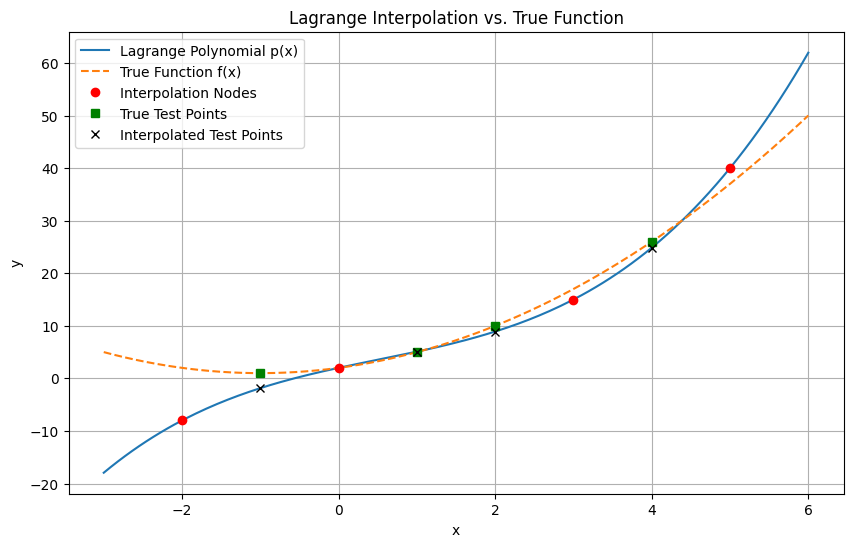

In [ ]:
# --- Step 0: Define the given data ---
# The function f(x) = x^2 + 2x + 2
f = lambda x: x**2 + 2*x + 2

# The nodes for interpolation
data_x = np.array([-2, 0, 3, 5])
data_y = np.array([-8, 2, 15, 40])

# The new test points
x_arr = np.array([-1, 1, 2, 4])

# --- Step 1: Create the Lagrange interpolating polynomial object ---
p = Lagrange_Polynomial(data_x, data_y)
print("--- The Interpolating Polynomial ---")
print(p)

# --- Step 2: Calculate interpolated values for x_arr ---
p_x_arr = p(x_arr)
print(f"\n1. Interpolated values p(x) at {x_arr} are:\n{p_x_arr}")

# --- Step 3: Calculate the true values from f(x) for x_arr ---
f_x_arr = f(x_arr)
print(f"\n2. True values f(x) at {x_arr} are:\n{f_x_arr}")

# --- Step 4: Calculate the absolute error at each point ---
error_arr = np.abs(p_x_arr - f_x_arr)
print(f"\n3. Absolute error |p(x) - f(x)| at each point is:\n{error_arr}")

# --- Step 5: Find and print the maximum error ---
max_error = np.max(error_arr)
print(f"\n4. The MAXIMUM absolute error is: {max_error:.4f}")

# --- Optional: Visualization to see the difference ---
x_plot = np.linspace(-3, 6, 200)
y_plot_p = p(x_plot)
y_plot_f = f(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot_p, label='Lagrange Polynomial p(x)')
plt.plot(x_plot, y_plot_f, label='True Function f(x)', linestyle='--')
plt.plot(data_x, data_y, 'ro', label='Interpolation Nodes')
plt.plot(x_arr, f_x_arr, 'gs', label='True Test Points')
plt.plot(x_arr, p_x_arr, 'kx', label='Interpolated Test Points')
plt.title("Lagrange Interpolation vs. True Function")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()